
# Trabajo Práctico 2


Descargar el dataset **Facebook comment volume** https://archive.ics.uci.edu/ml/datasets/Facebook+Comment+Volume+Dataset. 

El dataset tiene diferentes versiones, utilizaremos la **número 5** para train y para test **Features_TestSet**. 

Notar que trae **carpeta de train y de test**. 

Una descripcióm completa del dataset pueden encontrarla en el link. Se trata de publicaciones de Facebook y se quiere **predecir la columna 54: cantidad de comentarios en las próximas H horas"**.

El dataset contiene variables en muchos formatos diferentes, algunos de los cuales no hemos trabajado o no lo hemos hechos en profundidad. Esas variables pueden ser descartadas o bien hacer una investigación personal para ver de qué manera poder incluirlas para mejorar los resultados obtenidos.



# Importar librerías

Importar aquellas librerías que serán utilizadas en el trabajo.

In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

from wordcloud import WordCloud
from sklearn.feature_selection import mutual_info_classif
from scipy import stats

# Cargar datos
Cargar los datos de entrenamiento y test.
El dataset tiene diferentes versiones, utilizaremos la número 5 para "train" y para "test" Features_TestSet.
Las columnas son etiquetadas para tener una mejor interpretación.

In [213]:
columns=['Page_likes','Page_checkins','Page_interest','Page_category',
         'cc1_min','cc1_max','cc1_avg','cc1_med','cc1_std',
         'cc2_min','cc2_max','cc2_avg','cc2_med','cc2_std',
         'cc3_min','cc3_max','cc3_avg','cc3_med','cc3_std',
         'cc4_min','cc4_max','cc4_avg','cc4_med','cc4_std',
         'cc5_min','cc5_max','cc5_avg','cc5_med','cc5_std',
         'CC1','CC2','CC3','CC4','CC5',
         'base_time','post_length','post_shares','post_promotion',
         'hour_target',
         'sunday_pub','monday_pub','tuesday_pub','wednesday_pub','thursday_pub','friday_pub','saturday_pub',
         'sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base',
         'target'
        ]
data = pd.read_csv("./Dataset/Training/Features_Variant_5.csv", sep = ',', encoding = 'unicode_escape', header=None, names=columns)
test=pd.read_csv("./Dataset/Testing/Features_TestSet.csv", sep = ',', encoding = 'unicode_escape', header=None, names=columns)
data.shape


(199030, 54)

In [214]:
test.shape

(10044, 54)

# Análisis exploratorio básico y preprocesamiento de los datos

Análisis de los datos para conocer los mismos, ver datos faltantes, decidir cómo tratarlos, ver distribuciones, relaciones, etc. Procesar los datos centrándolos, reescalando, codificando, reduciendo dimensiones, etc. según considere necesario.

In [215]:
data.head()
#data.info()
#data.describe()
#corr_matrix = data.corr()
#read the data

,Page_likes,Page_checkins,Page_interest,Page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
0,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0
1,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,1,0,0,0,0,0,0,0
2,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,0.0,1280.0,13.158779,1.0,94.99364,0.0,...,0,0,0,0,0,0,1,0,0,0


In [216]:
data.describe()


,Page_likes,Page_checkins,Page_interest,Page_category,cc1_min,cc1_max,cc1_avg,cc1_med,cc1_std,cc2_min,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,0.470256,485.317656,55.901120,35.263538,68.090731,0.068135,...,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,13.178067,538.194418,86.515496,68.162671,82.411057,2.172591,...,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,0.000000,49.000000,5.494737,2.000000,8.033255,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,0.000000,256.000000,23.647407,12.000000,35.022296,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,0.000000,784.000000,70.931961,41.000000,104.152684,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,1458.000000,2495.000000,2031.000000,2123.000000,762.357746,227.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1702.000000


In [217]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199030 entries, 0 to 199029
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Page_likes      199030 non-null  int64  
 1   Page_checkins   199030 non-null  int64  
 2   Page_interest   199030 non-null  int64  
 3   Page_category   199030 non-null  int64  
 4   cc1_min         199030 non-null  float64
 5   cc1_max         199030 non-null  float64
 6   cc1_avg         199030 non-null  float64
 7   cc1_med         199030 non-null  float64
 8   cc1_std         199030 non-null  float64
 9   cc2_min         199030 non-null  float64
 10  cc2_max         199030 non-null  float64
 11  cc2_avg         199030 non-null  float64
 12  cc2_med         199030 non-null  float64
 13  cc2_std         199030 non-null  float64
 14  cc3_min         199030 non-null  float64
 15  cc3_max         199030 non-null  float64
 16  cc3_avg         199030 non-null  float64
 17  cc3_med   


Elimino todos los datos float64 de mi data y test.
A mi entender son informaciones que a priori no utilizare para predecir.

In [218]:
data = data.drop(['cc1_min'],axis='columns')
data = data.drop(['cc1_max'],axis='columns')
data = data.drop(['cc1_avg'],axis='columns')
data = data.drop(['cc1_med'],axis='columns')
data = data.drop(['cc1_std'],axis='columns')
data = data.drop(['cc2_min'],axis='columns')
data = data.drop(['cc2_max'],axis='columns')
data = data.drop(['cc2_avg'],axis='columns')
data = data.drop(['cc2_med'],axis='columns')
data = data.drop(['cc2_std'],axis='columns')
data = data.drop(['cc3_min'],axis='columns')
data = data.drop(['cc3_max'],axis='columns')
data = data.drop(['cc3_avg'],axis='columns')
data = data.drop(['cc3_med'],axis='columns')
data = data.drop(['cc3_std'],axis='columns')
data = data.drop(['cc4_min'],axis='columns')
data = data.drop(['cc4_max'],axis='columns')
data = data.drop(['cc4_avg'],axis='columns')
data = data.drop(['cc4_med'],axis='columns')
data = data.drop(['cc4_std'],axis='columns')
data = data.drop(['cc5_min'],axis='columns')
data = data.drop(['cc5_max'],axis='columns')
data = data.drop(['cc5_avg'],axis='columns')
data = data.drop(['cc5_med'],axis='columns')
data = data.drop(['cc5_std'],axis='columns')

In [219]:
test = test.drop(['cc1_min'],axis='columns')
test = test.drop(['cc1_max'],axis='columns')
test = test.drop(['cc1_avg'],axis='columns')
test = test.drop(['cc1_med'],axis='columns')
test = test.drop(['cc1_std'],axis='columns')
test = test.drop(['cc2_min'],axis='columns')
test = test.drop(['cc2_max'],axis='columns')
test = test.drop(['cc2_avg'],axis='columns')
test = test.drop(['cc2_med'],axis='columns')
test = test.drop(['cc2_std'],axis='columns')
test = test.drop(['cc3_min'],axis='columns')
test = test.drop(['cc3_max'],axis='columns')
test = test.drop(['cc3_avg'],axis='columns')
test = test.drop(['cc3_med'],axis='columns')
test = test.drop(['cc3_std'],axis='columns')
test = test.drop(['cc4_min'],axis='columns')
test = test.drop(['cc4_max'],axis='columns')
test = test.drop(['cc4_avg'],axis='columns')
test = test.drop(['cc4_med'],axis='columns')
test = test.drop(['cc4_std'],axis='columns')
test = test.drop(['cc5_min'],axis='columns')
test = test.drop(['cc5_max'],axis='columns')
test = test.drop(['cc5_avg'],axis='columns')
test = test.drop(['cc5_med'],axis='columns')
test = test.drop(['cc5_std'],axis='columns')

Verifico si hay valores nulos en cada columna

In [220]:
#Check null and sum them
data.isnull().sum()
#there are no null values

Page_likes        0
Page_checkins     0
Page_interest     0
Page_category     0
CC1               0
CC2               0
CC3               0
CC4               0
CC5               0
base_time         0
post_length       0
post_shares       0
post_promotion    0
hour_target       0
sunday_pub        0
monday_pub        0
tuesday_pub       0
wednesday_pub     0
thursday_pub      0
friday_pub        0
saturday_pub      0
sunday_base       0
monday_base       0
tuesday_base      0
wednesday_base    0
thursday_base     0
friday_base       0
saturday_base     0
target            0
dtype: int64

In [221]:
data.describe()

,Page_likes,Page_checkins,Page_interest,Page_category,CC1,CC2,CC3,CC4,CC5,base_time,...,friday_pub,saturday_pub,sunday_base,monday_base,tuesday_base,wednesday_base,thursday_base,friday_base,saturday_base,target
count,1.990300e+05,199030.000000,1.990300e+05,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,...,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.000000,199030.00000,199030.000000
mean,1.313785e+06,4674.517731,4.477173e+04,24.242074,55.901120,21.814581,19.992318,52.753746,1.822263,35.449972,...,0.146209,0.136954,0.139391,0.134829,0.136788,0.147088,0.155298,0.144245,0.14236,7.168708
std,6.771131e+06,20573.440641,1.108983e+05,19.935334,137.524122,74.658414,73.624779,128.434403,94.092191,21.005670,...,0.353317,0.343800,0.346355,0.341542,0.343625,0.354195,0.362190,0.351338,0.34942,34.298193
min,3.600000e+01,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,-2038.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,3.673400e+04,0.000000,6.980000e+02,9.000000,2.000000,0.000000,0.000000,2.000000,-6.000000,17.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.929110e+05,0.000000,7.237000e+03,18.000000,11.000000,2.000000,0.000000,10.000000,0.000000,35.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,1.204214e+06,99.000000,5.026400e+04,32.000000,46.000000,11.000000,9.000000,44.000000,3.000000,54.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,3.000000
max,4.869723e+08,186370.000000,6.089942e+06,106.000000,2495.000000,2119.000000,2095.000000,2184.000000,2119.000000,72.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1702.000000


Visualizacion de datos
Como nuestro "target" esta distribuido

/home/santiago/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/santiago/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of target')

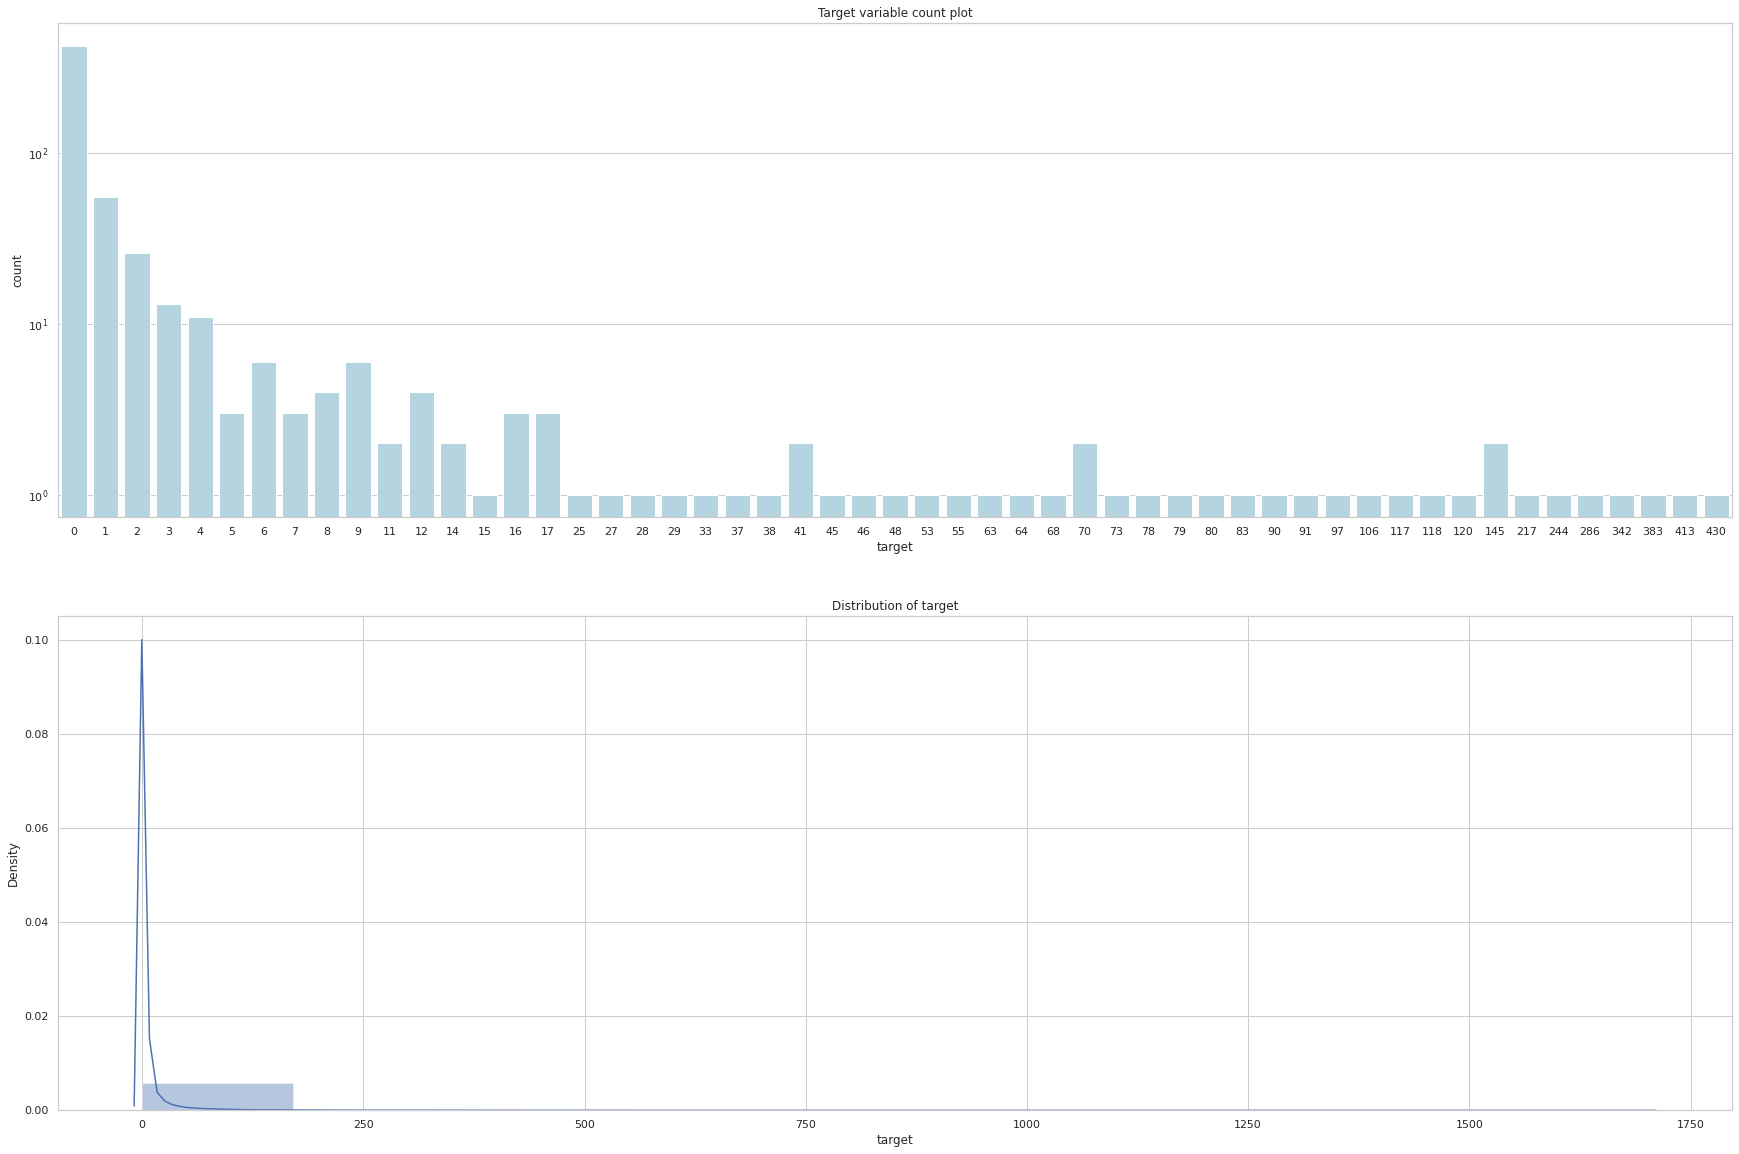

In [223]:
'''Data visualization'''
#starting from plotting target value in order to see
#how the target value is distributed
f,axs=plt.subplots(figsize=(30,20),nrows=2)
values=list(set(data['target'].astype('int')))
sns.countplot(values,data=data['target'].astype('int'), color='lightblue',ax=axs[0])
axs[0].set(yscale='log')
axs[0].set_title('Target variable count plot')

sns.distplot(data.target,bins=10,ax=axs[1])
axs[1].set_title('Distribution of target')

#plt.savefig('distribution_of_target.png', dpi=300, bbox_inches='tight',transparent=True)


Plot de cada "feature" del dataset

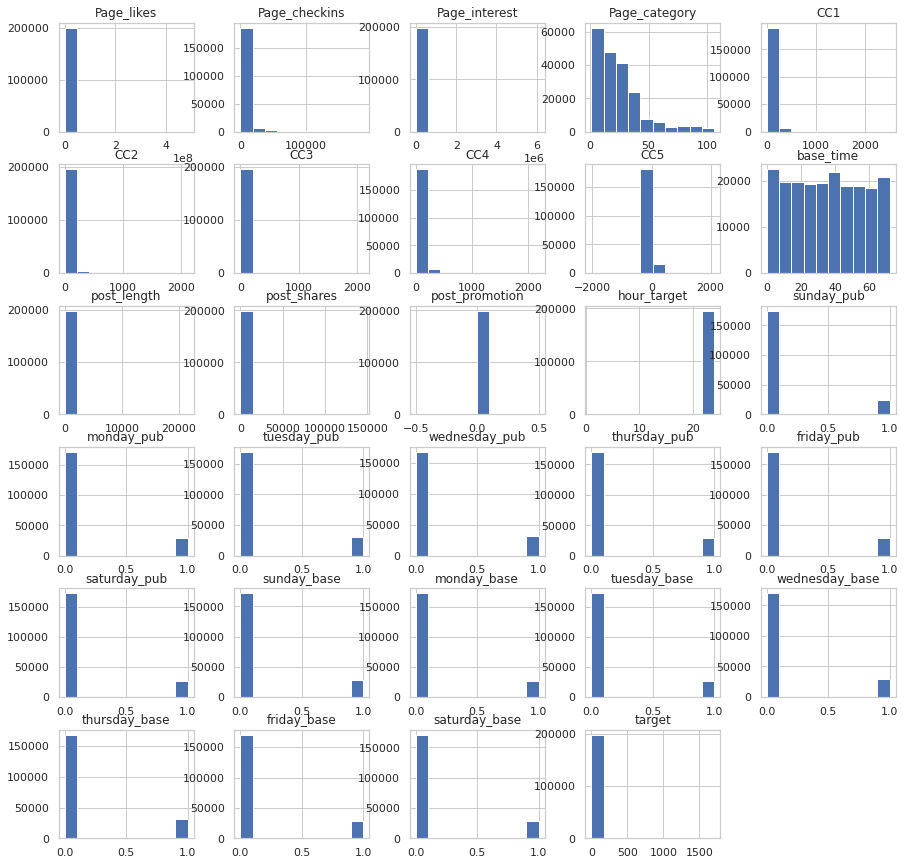

In [224]:
#plots of each feature
data.hist(figsize=(15,15))
#plt.savefig('distribution_of_features.png', dpi=300, bbox_inches='tight')
plt.show()


Enumero el numero de publicaciones por cada dia de la semana

Text(0, 0.5, 'NumPostsPublished')

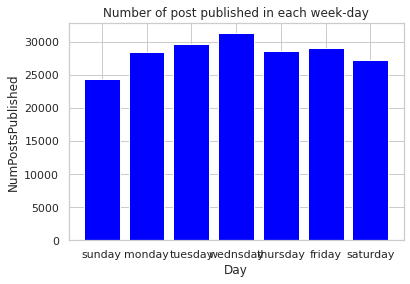

In [225]:
days=["sunday", "monday", "tuesday", "wednsday", "thursday", "friday", "saturday"]
sund_pub= (data['sunday_pub']==1).sum()
mon_pub= (data['monday_pub']==1).sum()
tue_pub= (data['tuesday_pub']==1).sum()
wed_pub= (data['wednesday_pub']==1).sum()
thur_pub= (data['thursday_pub']==1).sum()
fri_pub= (data['friday_pub']==1).sum()
sat_pub= (data['saturday_pub']==1).sum()
count_pub= [sund_pub, mon_pub, tue_pub,wed_pub,thur_pub,fri_pub,sat_pub]

plt.bar(days, count_pub, color='blue')
plt.title('Number of post published in each week-day')
plt.xlabel('Day')
plt.ylabel('NumPostsPublished')
#plt.savefig('NumberOfPostPublishedInEachWeekDay.png', dpi=100, bbox_inches='tight')



Enumero ocurrencias por cada dia de la semana( 0 y 71
horas-base-) de las publicaciones

Text(0, 0.5, 'Occurrences')

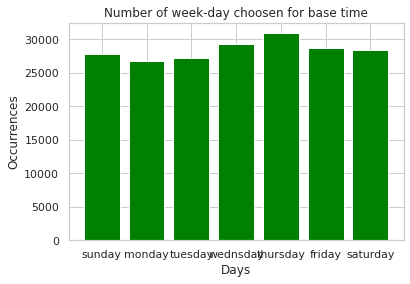

In [226]:
sund_pub= (data['sunday_base']==1).sum()
mon_pub= (data['monday_base']==1).sum()
tue_pub= (data['tuesday_base']==1).sum()
wed_pub= (data['wednesday_base']==1).sum()
thur_pub= (data['thursday_base']==1).sum()
fri_pub= (data['friday_base']==1).sum()
sat_pub= (data['saturday_base']==1).sum()
count_base= [sund_pub, mon_pub, tue_pub,wed_pub,thur_pub,fri_pub,sat_pub]

plt.bar(days, count_base, color='green')
plt.title('Number of week-day choosen for base time')
plt.xlabel('Days')
plt.ylabel('Occurrences')
#plt.savefig('NumberOfPostPublishedInEachWeek-day.png', dpi=300, bbox_inches='tight')


Muestro una relacion entre la hora nro de comentarios en las sig. horas y la hora en q son recibidos los comentarios

Text(0.5, 1.0, 'Target in function of the hour H')

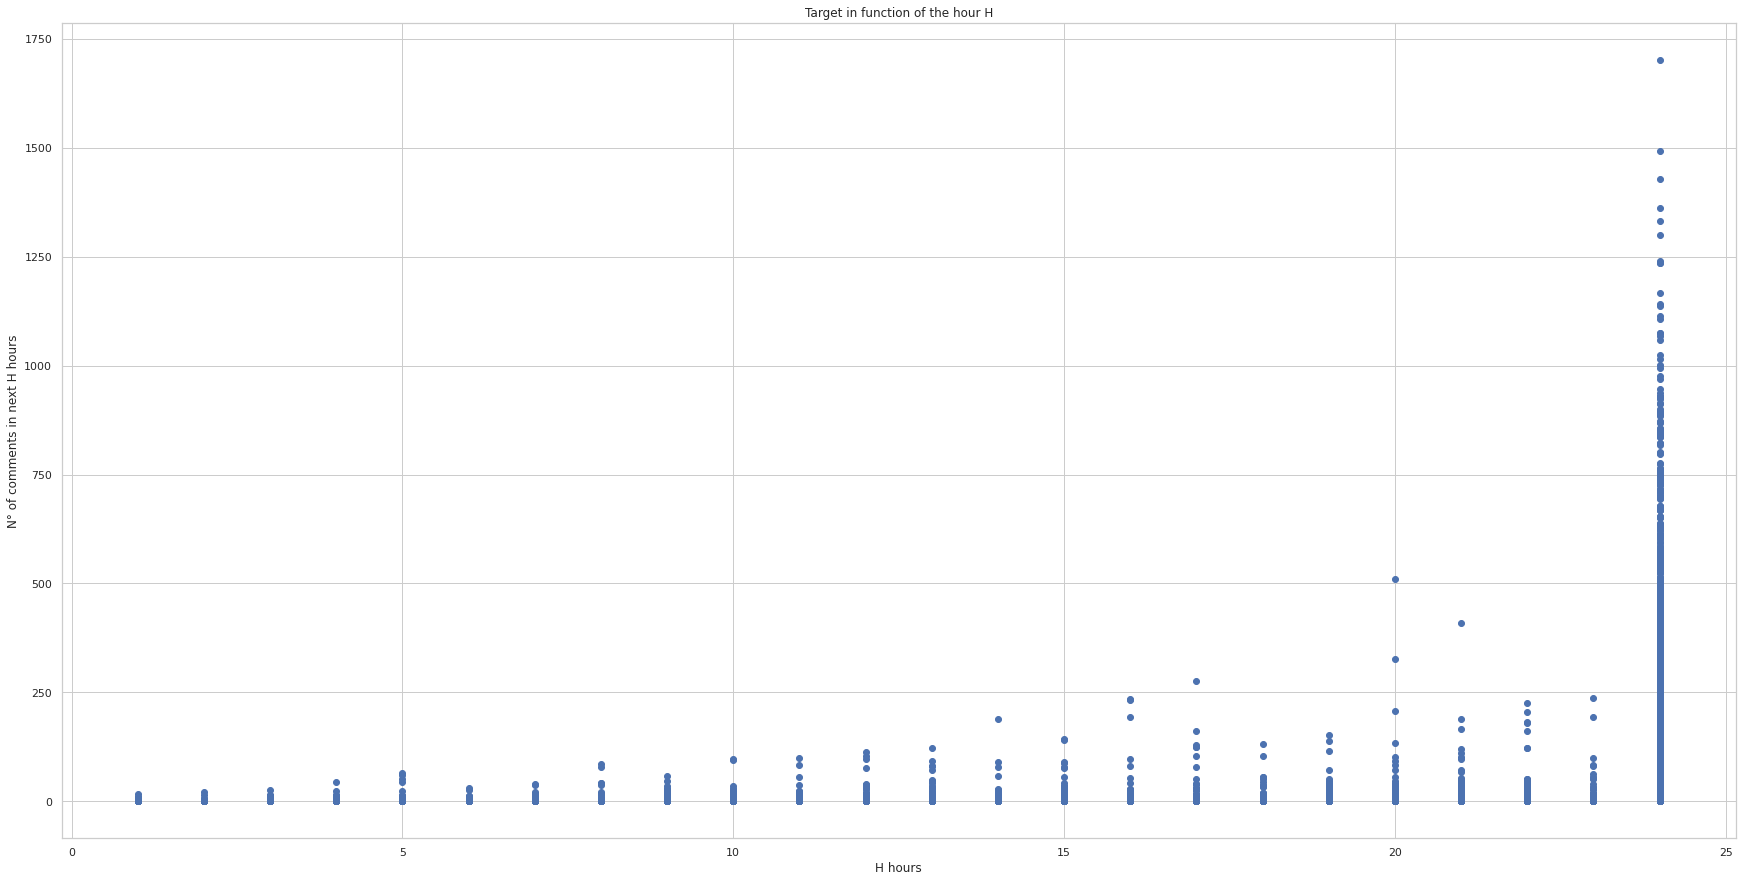

In [227]:
fig,axs=plt.subplots(figsize=(30, 15),nrows=1)

x = data['hour_target'] #This feature defines the time at which the target comments are received
y = data['target']
axs.scatter(x, y)
axs.set_ylabel("N° of comments in next H hours")
axs.set_xlabel("H hours")
axs.set_title("Target in function of the hour H")

#plt.savefig('Target in function of the hour H c.png', dpi=300, bbox_inches='tight')

Verifico si hay "promoted post"

In [229]:
promoted_posts=0
for i in range(len(data)):
    if( data["post_promotion"][i]==1):
        #his feature is a binary feature that indicates whether the person has advertisedthei content or not?
        promoted_posts+=1
promoted_posts


0

Elimino columna "post_promotion"

In [230]:
print(promoted_posts)
data = data.drop(['post_promotion'],axis='columns')
test = test.drop(['post_promotion'],axis='columns')

0


In [231]:
plt.figure(figsize=(18, 9))
sns.set(style="whitegrid")
data.corr()
data.shape


(199030, 28)

<Figure size 1296x648 with 0 Axes>

In [232]:
data.shape

(199030, 28)

Generamos una matriz correlacionada entre el target,los post publicados en los dias y base tiempo entre dias.

/tmp/ipykernel_5023/2527866781.py:11: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  plt.ylim(b, t)


<AxesSubplot:>

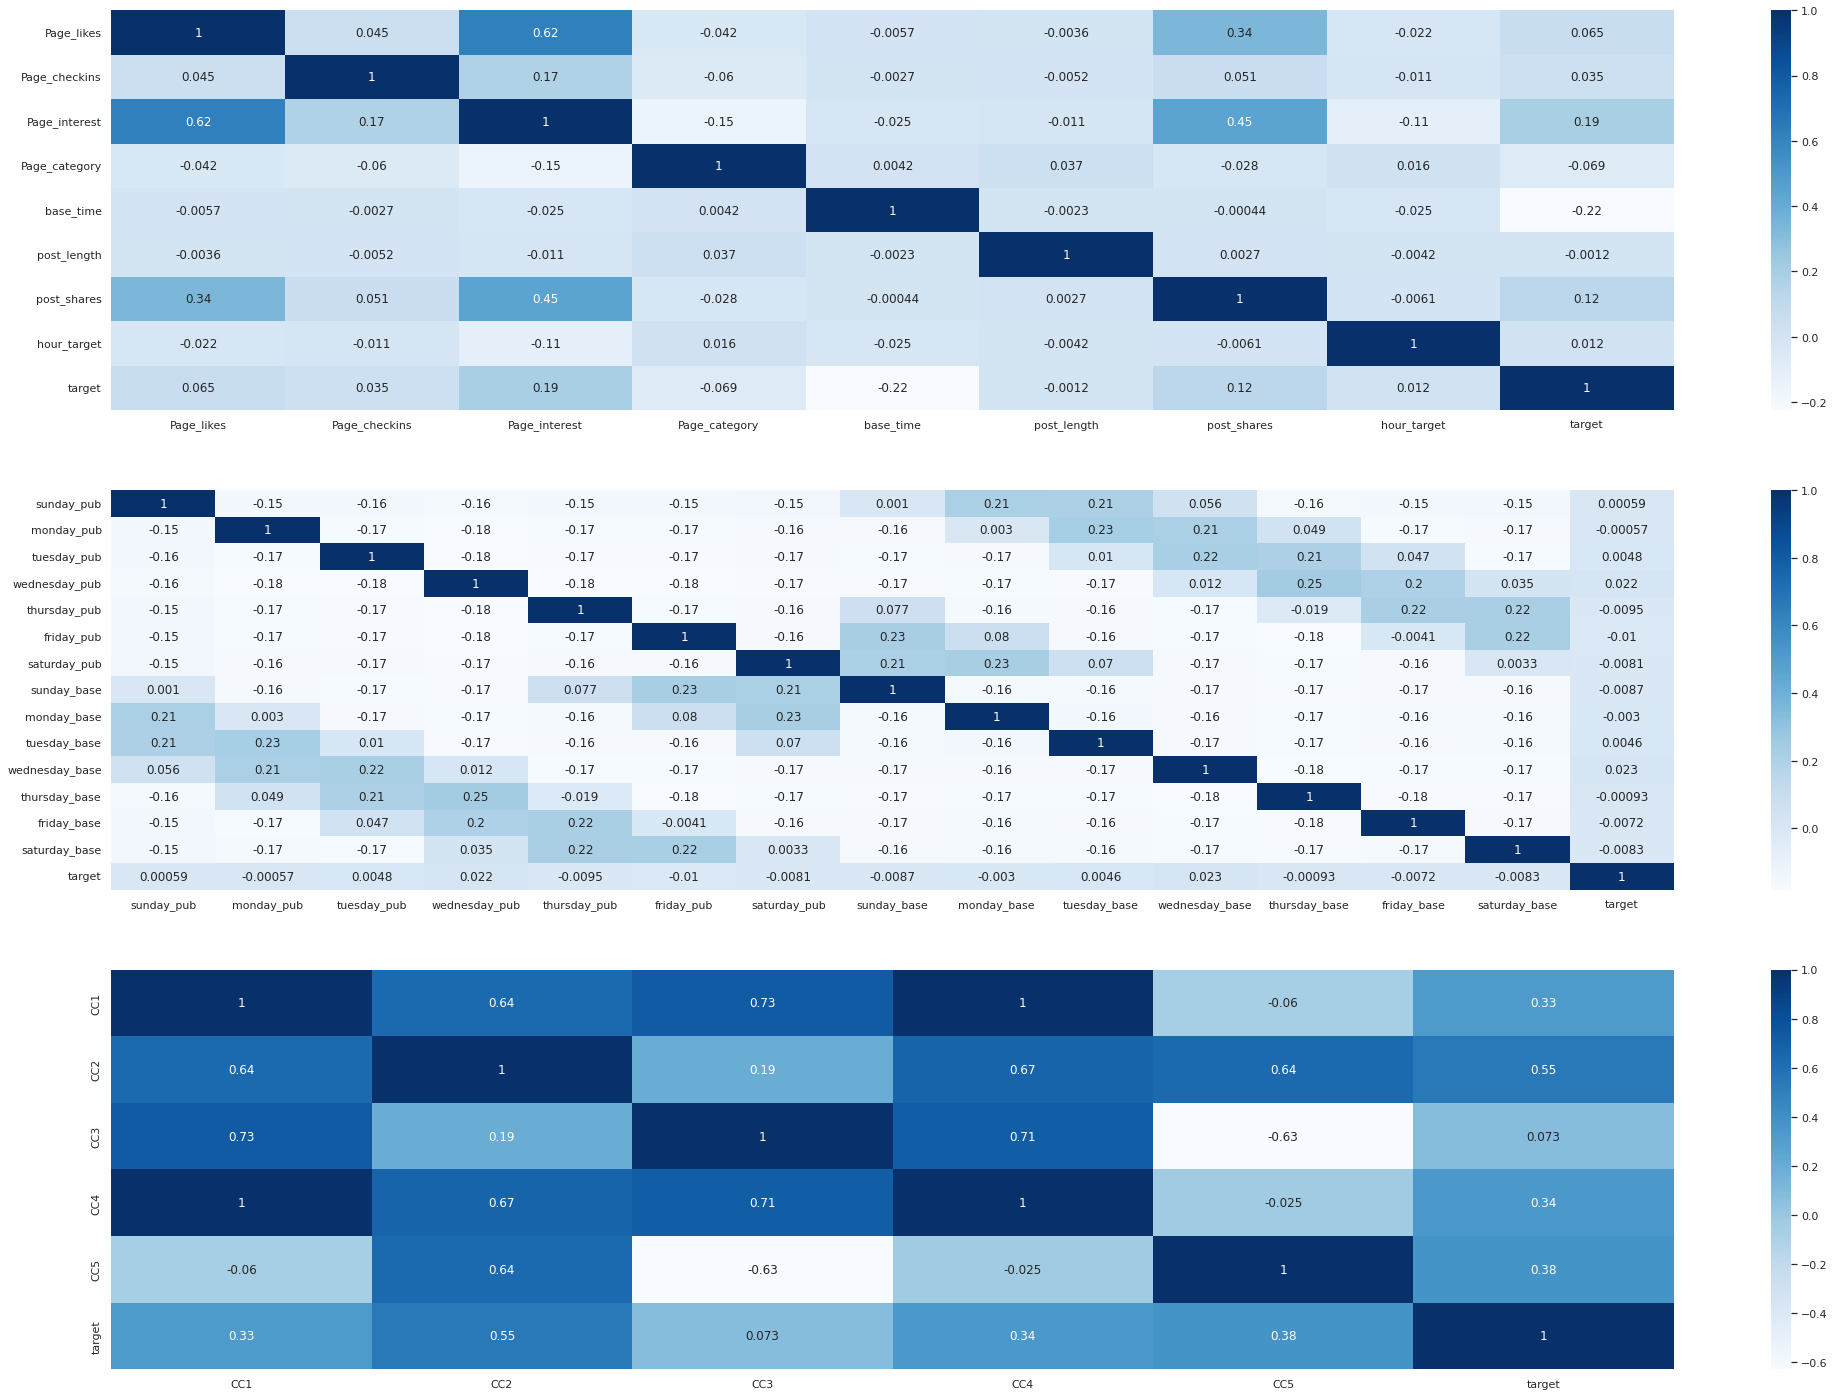

In [233]:
fig,axs=plt.subplots(figsize=(35, 25),nrows=3)

corr1=['Page_likes','Page_checkins','Page_interest','Page_category','base_time','post_length','post_shares',
         'hour_target', 'target']
sns.set(style="whitegrid")
corr = data[corr1].corr()
sns.heatmap(corr,annot=True,ax=axs[0], cmap="Blues")
b, t = plt.ylim() #plt limits of size
b += 0.5
t -= 0.5
plt.ylim(b, t)

corr2=['sunday_pub','monday_pub','tuesday_pub','wednesday_pub','thursday_pub','friday_pub','saturday_pub','sunday_base','monday_base','tuesday_base','wednesday_base','thursday_base','friday_base','saturday_base','target']
sns.set(style="whitegrid")
corr = data[corr2].corr()
sns.heatmap(corr,annot=True,ax=axs[1],cmap="Blues")

corr3=[ 'CC1','CC2','CC3','CC4','CC5','target']
sns.set(style="whitegrid")
corr = data[corr3].corr()
sns.heatmap(corr,annot=True,ax=axs[2],cmap="Blues")

Ploteamos la relacion entre la variable objetivo "target" y las categorias de la 4ta columna "page category"

(-0.5, 3999.5, 1999.5, -0.5)

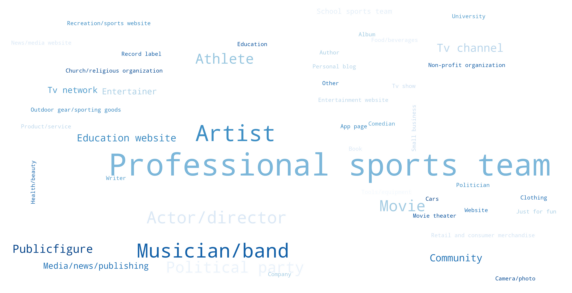

In [234]:
# 106 different categories
category_val=data['Page_category'].values.tolist()

category=['Product/service','Publicfigure','Retail and consumer merchandise','Athlete','Education website','Arts/entertainment/nightlife','Aerospace/defense',
          'Actor/director','Professional sports team','Travel/leisure','Arts/humanities website','Food/beverages','Record label','Movie','Song','Community',
          'Company','Artist','Non-governmental organization (ngo)','Media/news/publishing','Cars','Clothing','Local business','Musician/band','Politician',
          'News/media website','Education','Author','Sports event','Restaurant/cafe','School sports team','University','Tv show','Website','Outdoor gear/sporting goods',
          'Political party','Sports league','Entertainer','Church/religious organization','Non-profit organization','Automobiles and parts','Tv channel','Telecommunication',
          'Entertainment website','Shopping/retail','Personal blog','App page','Vitamins/supplements','Professional services','Movie theater','Software','Magazine','Electronics',
          'School', 'Just for fun','Club','Comedian','Sports venue','Sports/recreation/activities','Publisher','Tv network','Health/medical/pharmacy',
          'Studio','Home decor','Jewelry/watches','Writer','Health/beauty','Music video','Appliances','Computers/technology','Insurance company',
          'Music award','Recreation/sports website','Reference website','Business/economy website','Bar','Album','Games/toys','Camera/photo','Book','Producer',
          'Landmark','Cause','Organization','Tv/movie award','Hotel','Health/medical/pharmaceuticals','Transportation','Local/travel website','Musical instrument',
          'Radio station','Other','Computers','Phone/tablet','Coach','Tools/equipment','Internet/software','Bank/financial institution','Society/culture website','Small business',
          'News personality','Teens/kids website','Government official','Photographer','Spas/beauty/personal care','Video game']

to_category=[category[i-1]for i in category_val]
sum_category=[0 for i in range(len(category))]

target=data['target'].values.tolist()
for idx,y in enumerate(category_val):
    sum_category[y-1]+=target[idx]

dic_category=dict(zip(category,sum_category))
#Generate category vs frequencies
wc1 = WordCloud(scale=10,colormap="Blues",background_color="white",collocations=False).generate_from_frequencies(dic_category)
plt.figure(figsize=(10,10))
plt.imshow(wc1,interpolation="bilinear")
plt.axis("off")
#plt.savefig('WordCloudCategories.png', dpi=300, bbox_inches='tight')

In [235]:
#tal vez no sera necesario
#dummification of categories not to get bias
dummy_category=pd.get_dummies(data['Page_category'],prefix="category_")
dummy_category.head()
col=dummy_category.columns.tolist()
## if some categories are not contained in the training data : we created columns
for i in range (1,107):
    if 'category__'+str(i) not in col:
        dummy_category['category__'+str(i)]=[0 for i in range(199030)]



In [236]:
data.shape

(199030, 28)

In [237]:
test.shape

(10044, 28)

Detectamos los "Outliers"

Text(0.5, 1.0, 'Boxplot of post_lenght')

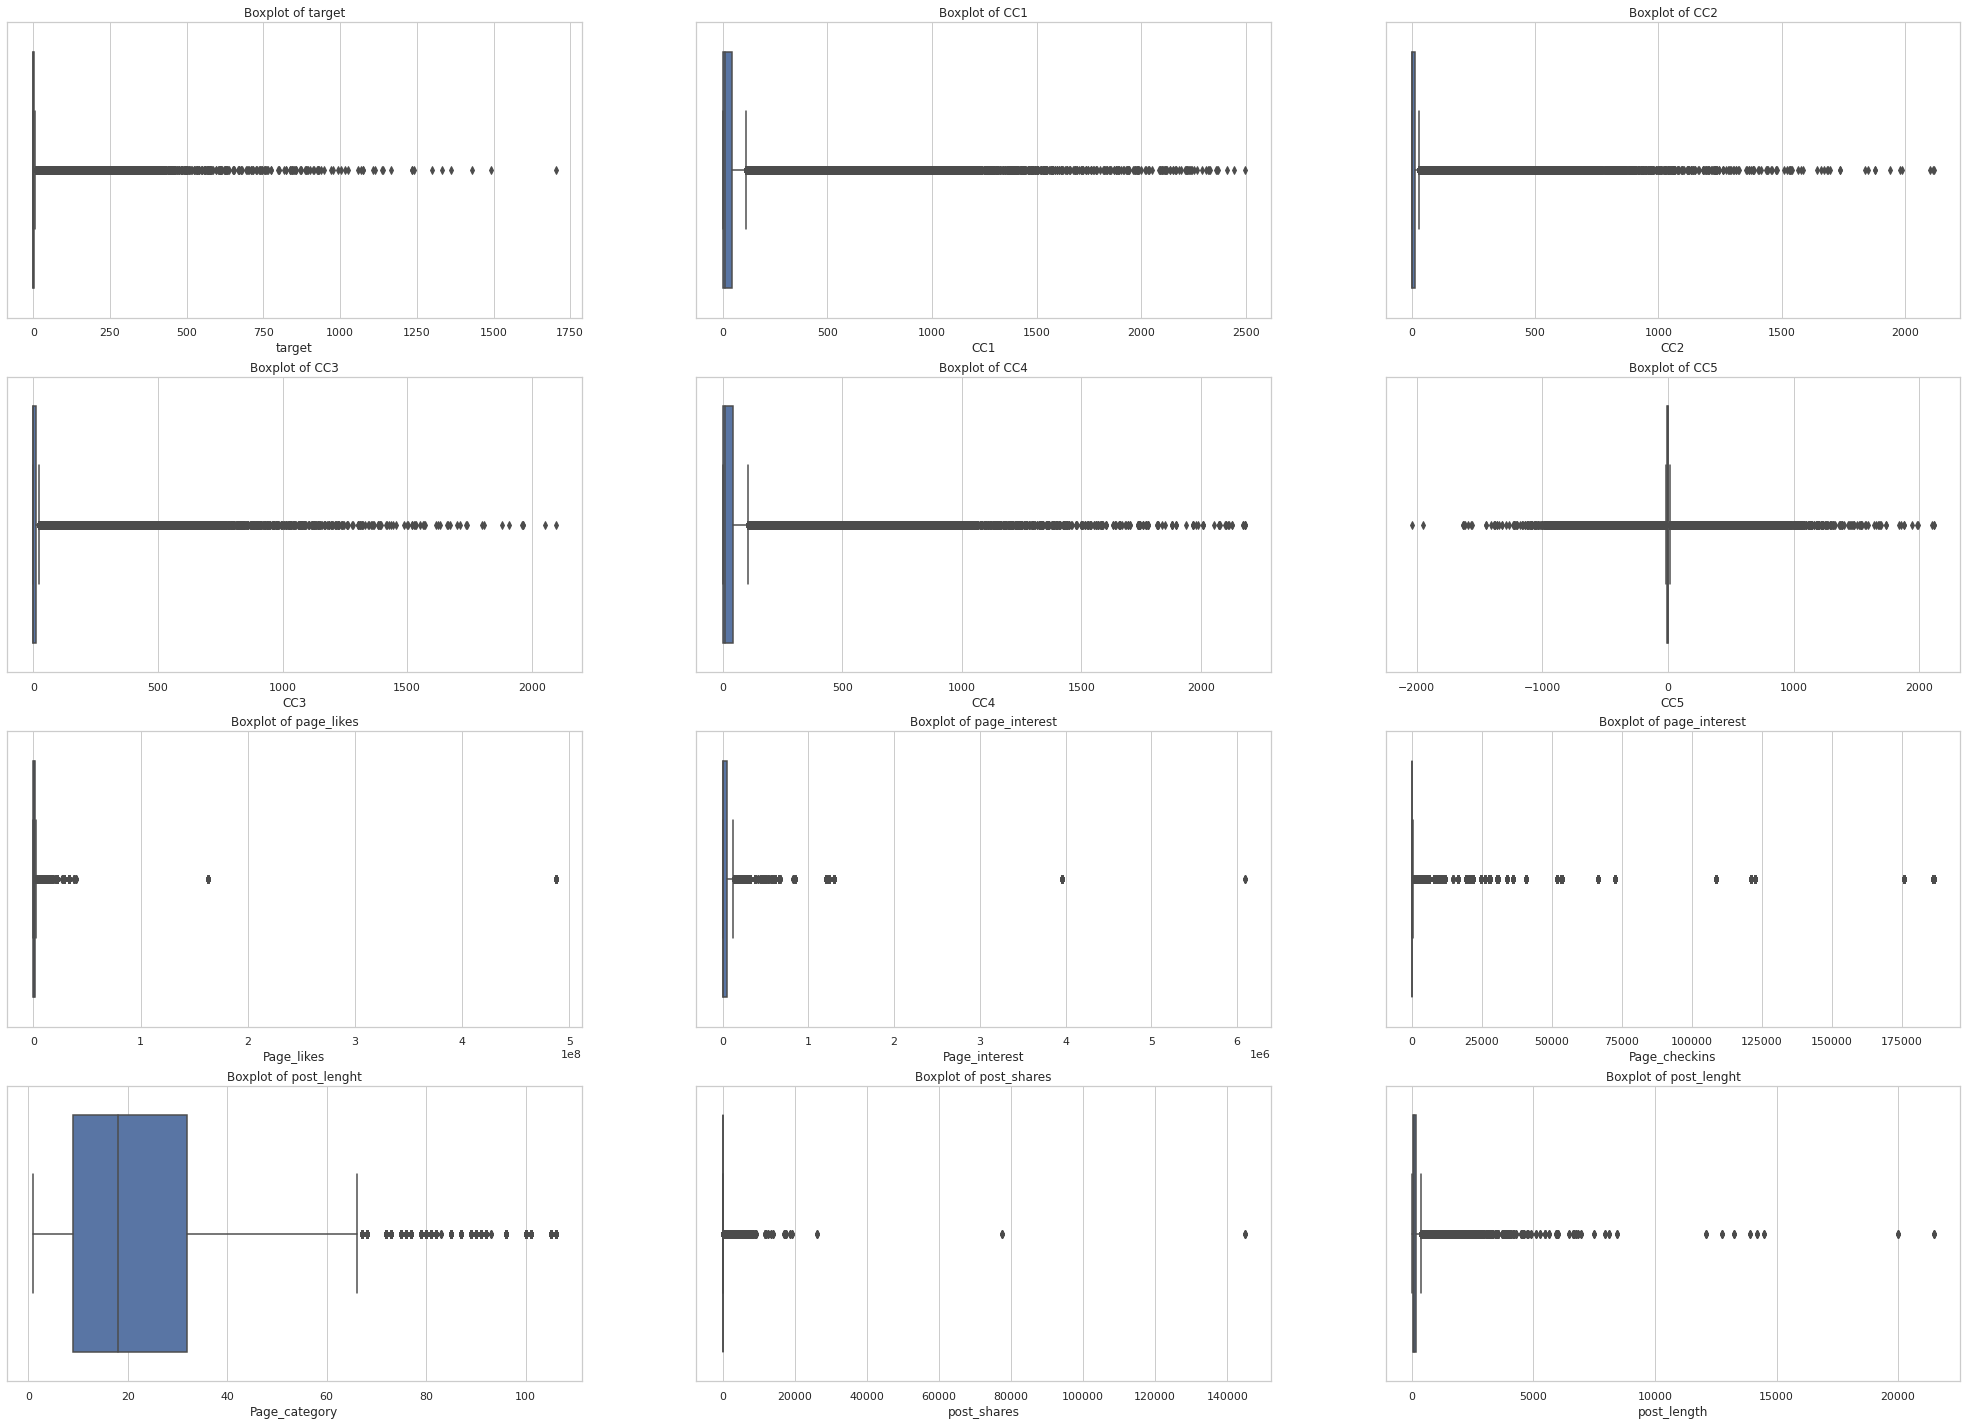

In [238]:
#Outliers detection
fig, axs = plt.subplots(ncols=3,nrows=4,figsize=(35,25))

sns.boxplot(x=data["target"],ax=axs[0][0])
axs[0][0].set_title('Boxplot of target')

sns.boxplot(x=data["CC1"],ax=axs[0][1])
axs[0][1].set_title('Boxplot of CC1')

sns.boxplot(x=data["CC2"],ax=axs[0][2])
axs[0][2].set_title('Boxplot of CC2')

sns.boxplot(x=data["CC3"],ax=axs[1][0])
axs[1][0].set_title('Boxplot of CC3')

sns.boxplot(x=data["CC4"],ax=axs[1][1])
axs[1][1].set_title('Boxplot of CC4')

sns.boxplot(x=data["CC5"],ax=axs[1][2])
axs[1][2].set_title('Boxplot of CC5')

sns.boxplot(x=data["Page_likes"],ax=axs[2][0])
axs[2][0].set_title('Boxplot of page_likes')

sns.boxplot(x=data["Page_interest"],ax=axs[2][1])
axs[2][1].set_title('Boxplot of page_interest')

sns.boxplot(x=data["Page_checkins"],ax=axs[2][2])
axs[2][2].set_title('Boxplot of page_interest')

sns.boxplot(x=data["Page_category"],ax=axs[3][0])
axs[3][0].set_title('Boxplot of post_lenght')

sns.boxplot(x=data["post_shares"],ax=axs[3][1])
axs[3][1].set_title('Boxplot of post_shares')

sns.boxplot(x=data["post_length"],ax=axs[3][2])
axs[3][2].set_title('Boxplot of post_lenght')
#plt.savefig('BoxplotsBefore c.png', dpi=300, bbox_inches='tight')

De acuerdo a una gaussiana normalizada tomamos los datos entre 99.7% de probabilidad

In [239]:
z = np.abs(stats.zscore(data))
threshold = 3
data_o = data[(z < 3).all(axis=1)]
print(data.shape)
print(data_o.shape)

(199030, 28)
(174864, 28)


Verificamos los outliers removidos

Text(0.5, 1.0, 'Boxplot of post_lenght')

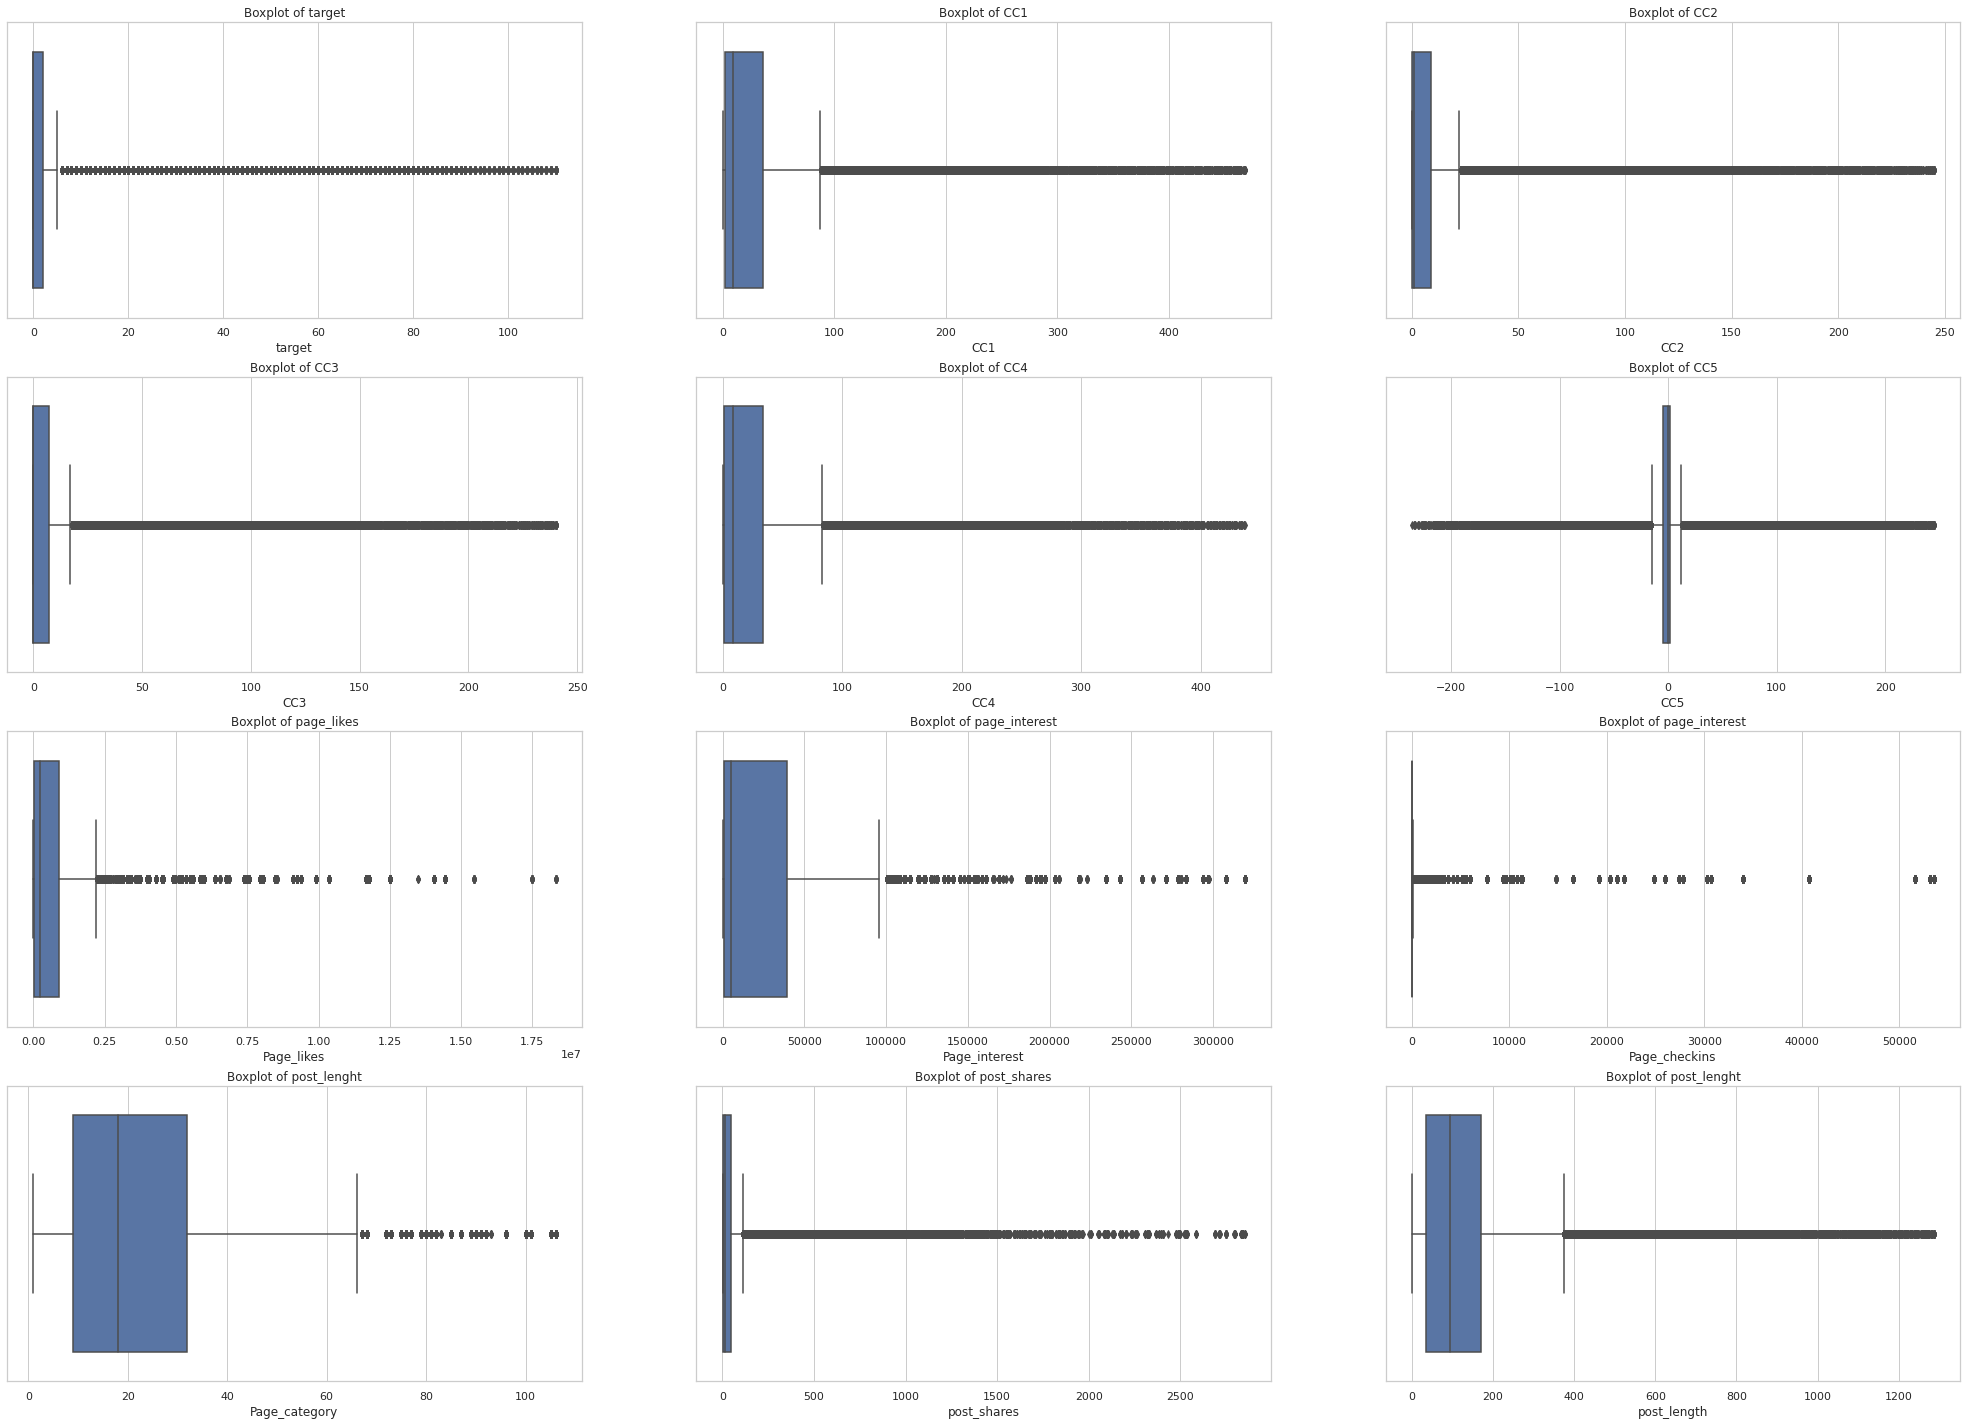

In [241]:
#Verify the new box plot after outliers removal
fig, axs = plt.subplots(ncols=3,nrows=4,figsize=(35,25))
sns.boxplot(x=data_o["target"],ax=axs[0][0])
axs[0][0].set_title('Boxplot of target')

sns.boxplot(x=data_o["CC1"],ax=axs[0][1])
axs[0][1].set_title('Boxplot of CC1')

sns.boxplot(x=data_o["CC2"],ax=axs[0][2])
axs[0][2].set_title('Boxplot of CC2')

sns.boxplot(x=data_o["CC3"],ax=axs[1][0])
axs[1][0].set_title('Boxplot of CC3')

sns.boxplot(x=data_o["CC4"],ax=axs[1][1])
axs[1][1].set_title('Boxplot of CC4')

sns.boxplot(x=data_o["CC5"],ax=axs[1][2])
axs[1][2].set_title('Boxplot of CC5')

sns.boxplot(x=data_o["Page_likes"],ax=axs[2][0])
axs[2][0].set_title('Boxplot of page_likes')

sns.boxplot(x=data_o["Page_interest"],ax=axs[2][1])
axs[2][1].set_title('Boxplot of page_interest')

sns.boxplot(x=data_o["Page_checkins"],ax=axs[2][2])
axs[2][2].set_title('Boxplot of page_interest')

sns.boxplot(x=data["Page_category"],ax=axs[3][0])
axs[3][0].set_title('Boxplot of post_lenght')

sns.boxplot(x=data_o["post_shares"],ax=axs[3][1])
axs[3][1].set_title('Boxplot of post_shares')

sns.boxplot(x=data_o["post_length"],ax=axs[3][2])
axs[3][2].set_title('Boxplot of post_lenght')
#plt.savefig('BoxplotsAfter c.png', dpi=300, bbox_inches='tight')

In [242]:
data.shape

(199030, 28)

In [243]:
data_o.shape

(174864, 28)

Los datos no serán divididos ya que train y test vienen de bases de datos diferentes.
Sin embargo se hizo anteriormente un "split" de train y test solo en "data", para comparar los valores de error de prediccion respecto de tomar el test de un set diferente.

In [245]:
X_train=data_o.drop(['target'], axis='columns')
y_train=data_o['target']
X_test=test.drop(['target'], axis='columns')
y_test=test['target']
#
#X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.20, random_state=2) #stratify=y#

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test  = scaler.transform(X_test)

In [246]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(174864, 27)
(174864,)
(10044, 27)
(10044,)


Caracteristicas de importancia utilizando biblioteca sklearn -mutual_info_classif-

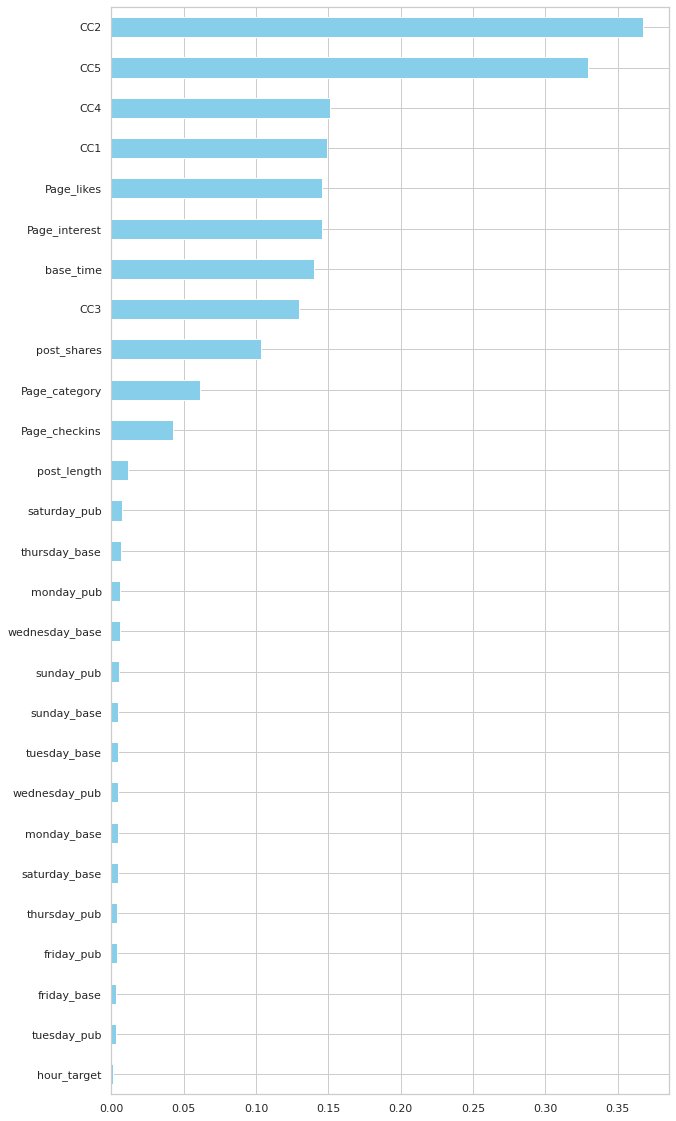

In [247]:
# feature importance
importances=mutual_info_classif(X_train,y_train)
feat_importances=pd.Series(importances,data_o.columns[0:len(data_o.columns)-1])
feat_importances=feat_importances.sort_values()
plt.figure(figsize=(10, 20))
feat_importances.plot(kind='barh',color='skyblue')
plt.show()



# Modelos y evaluación
Probar diferentes modelos para predecir la variable objetivo. Calcular las métricas que considere relevantes. Comentar los resultados.

 Implementamos las regresión lineal estándar y modelos regularizados con Ridge, Lasso y ElasticNet.
 Al final se comparan los errores de predicción (error medio cuadratico -rms-) y R2
 Es importante saber que el resultado del coeficiente de determinación R2 oscila entre 0 y 1. Cuanto más cerca de 1 se sitúe su valor, mayor será el ajuste del modelo a la variable que estamos intentando predecir.

In [248]:
'''Linear Regression'''
model_lr = linear_model.LinearRegression()
model_lr.fit(X_train,y_train)
y_pred_lr = model_lr.predict(X_test)
mse_lr = mean_squared_error(y_test,y_pred_lr)
rms_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test,y_pred_lr)

print('LR rmse',rms_lr,'LR r2', r2_lr)

LR rmse 107.68291253854781 LR r2 0.12362747586310519


In [249]:
'''Ridge'''
model_rr = linear_model.Ridge()
model_rr.fit(X_train,y_train)
y_pred_rr = model_rr.predict(X_test)
mse_rr = mean_squared_error(y_test,y_pred_rr)
rms_rr = np.sqrt(mse_rr)
r2_rr = r2_score(y_test,y_pred_rr)

print('RR rmse',rms_rr,'RR r2', r2_rr)

RR rmse 107.6829011039531 RR r2 0.12362766198296138


In [250]:
'''Lasso Regression'''
model_ls = linear_model.Lasso()
model_ls.fit(X_train,y_train)
y_pred_ls = model_ls.predict(X_test)
mse_ls = mean_squared_error(y_test,y_pred_ls)
rms_ls = np.sqrt(mse_ls)
r2_ls = r2_score(y_test,y_pred_ls)

print('LS rmse',rms_ls,'LS r2', r2_ls)


LS rmse 108.45136224733113 LS r2 0.11107485939533257


In [251]:
'''ElasticNet'''
model_en = linear_model.ElasticNet()
model_en.fit(X_train,y_train)
y_pred_en = model_en.predict(X_test)
mse_en = mean_squared_error(y_test,y_pred_en)
rms_en = np.sqrt(mse_en)
r2_en = r2_score(y_test,y_pred_en)

print('EN rmse',rms_en,'En r2', r2_en)


EN rmse 108.42169951008523 En r2 0.11156105608952582


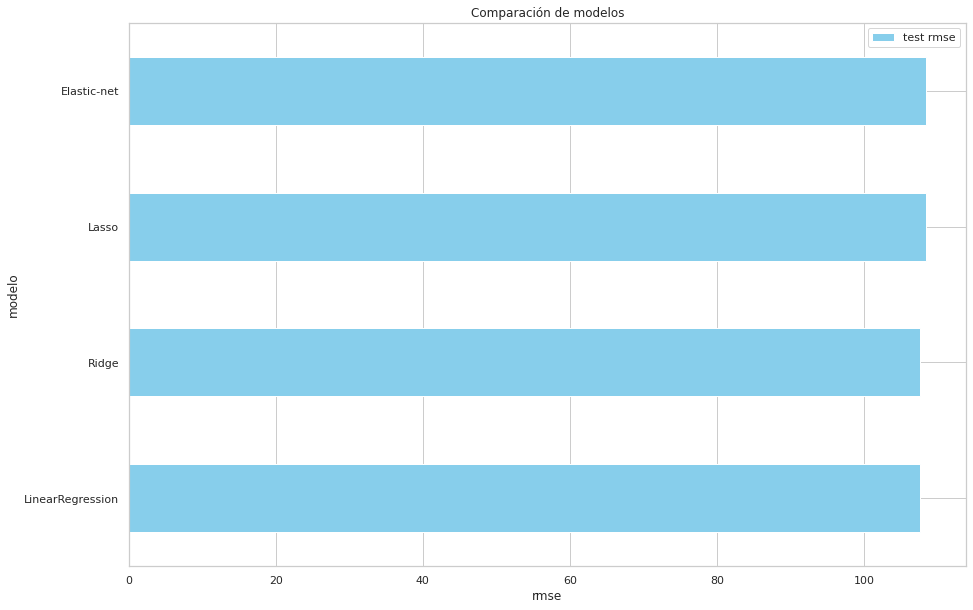

In [252]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test rmse': [rms_lr, rms_rr, rms_ls, rms_en]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax,color='skyblue')
ax.set_xlabel('rmse')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');



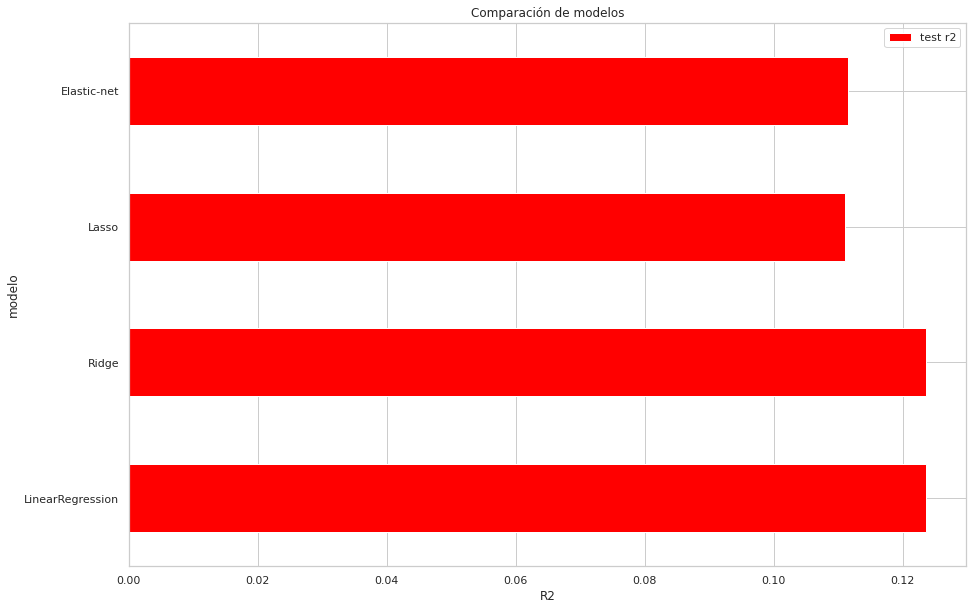

In [253]:
df_comparacion = pd.DataFrame({
                    'modelo': ['LinearRegression', 'Ridge', 'Lasso', 'Elastic-net'],
                    'test r2': [r2_lr, r2_rr, r2_ls, r2_en]
                 })

fig, ax = plt.subplots(figsize=(15, 10))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax,color='red')
ax.set_xlabel('R2')
ax.set_ylabel('modelo')
ax.set_title('Comparación de modelos');

Segun los plots de error, se puede decir que el valor predecido por regularizacion Ridge fue el mas cercano al dado por el test.
En mi opinion al valernos de datos de test por otra base de datos "Features_TestSet" tal vez influyo en no lograr un reducido error.
 En estos ejemplos la diferencia cuadratica es cerca a 100, a diferencia de un cálculo rapido de regression lineal que tome haciendo un split de la misma base de datos "nro 5" el cual me dio cercano a 20.
Por último fue interesante usar algunos conocimientos de probabilidad como en el ejemplo de sacar los outliers a partir de un modelo gaussiano, visualizacion y cálculo poderosos dado la biblioteca sklearn.
Resumiendo el tratar la base de datos desde una vista de clasificacion antes de proponer un modelo predictivo, puede ayudarnos a mejorar las predicciones o de acuerdo en mi caso de sacar datos que yo propongo que no son importantes puede llevar a mejores valores de predicción o no. Solo queda seguir proponiendo e iterando varias formas de clasificación para poder comparar para elejir finalmente el modelo adecuado.


